In [ ]:
import tqdm
import numpy as np
import matplotlib.pyplot as plt

$$
f(x) = \frac{\Delta{x}}{\Delta{t}}
$$

In [ ]:
j = 1
t_end = 10

$$
x_{n+1} = x_n + f(x_n)\Delta{t}
$$

In [ ]:
def solve_Euler(dt):
    global j, t_end
    x = [0]
    vx = [0]
    ax = [0]
    for t_now in np.arange(dt, t_end + dt, dt):
        x.append(x[-1] + vx[-1] * dt)
        vx.append(vx[-1] + ax[-1] * dt)
        ax.append(ax[-1] + j * dt)
    return x[-1]

$$
x_{n+1} = x_n + \frac{f(x_n) + f(\tilde{x}_{n+1})}{2}\Delta{t}
$$

In [ ]:
def solve_Euler_Cauchy(dt):
    global j, t_end
    x = [0]
    vx = [0]
    ax = [0]
    for t_now in np.arange(dt, t_end + dt, dt):
        vx_ = vx[-1] + ax[-1] * dt
        ax_ = ax[-1] + j * dt
        x.append(x[-1] + (vx[-1] + vx_) / 2 * dt)
        vx.append(vx[-1] + (ax[-1] + ax_) / 2 * dt)
        ax.append(ax[-1] + j * dt)
    return x[-1]

$$
x_{an} = \frac{jt^3}{6}
$$

In [ ]:
def solve_an():
    global j, t_end
    return j * (t_end ** 3) / 6

In [ ]:
e = []
ec = []
dts = []
for k in range(10 + 1):
    dt = 0.1 / (2 ** k)
    e.append(np.abs(solve_an() - solve_Euler(dt)))
    ec.append(np.abs(solve_an() - solve_Euler_Cauchy(dt)))
    dts.append(dt)

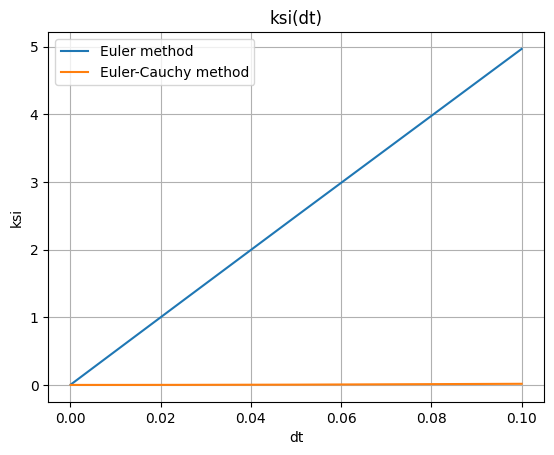

In [ ]:
plt.plot(dts, e, label='Euler method')
plt.plot(dts, ec, label='Euler-Cauchy method')
plt.title('ksi(dt)')
plt.xlabel('dt')
plt.ylabel('ksi')
plt.grid()
plt.legend()

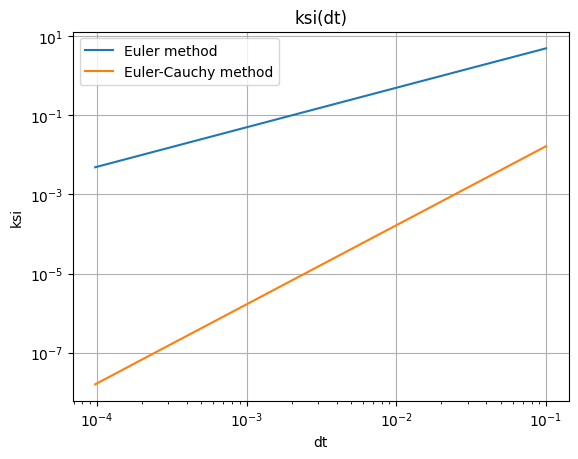

In [ ]:
plt.plot(dts, e, label='Euler method')
plt.plot(dts, ec, label='Euler-Cauchy method')
plt.title('ksi(dt)')
plt.xlabel('dt')
plt.xscale('log')
plt.ylabel('ksi')
plt.yscale('log')
plt.grid()
plt.legend()